# Assignment 1
## Cifar-10 classification with Fully Connected Network



First we import the necessary libraries.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

I0000 00:00:1761986699.956886    3768 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1761986700.411165    3768 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761986701.651796    3768 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Tensorflow is used for the backend of the project.

In [2]:
from keras import backend as K
print(K.backend())

tensorflow


When creating the model, we use an input step with 32x32 pixels, resulting in 784 units for the input layer.

Next we have a dense layer with 256 units, corresponding to the colour value of the given pixels from 0 to 255.

We added a layer of 100 units

In [3]:
# Create the model
# CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs) # Flatten the input for the dense layers
# x = layers.Dense(768, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

model.summary()


W0000 00:00:1761986709.210497    3768 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1761986709.213520    3768 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1761986709.389445    3768 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13121 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,258 (3.01 MB)

 Trainable params: 789,258 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

**Important:** Make sure to run the first code cell that imports `keras` and other libraries before proceeding with the rest of the notebook.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [5]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [6]:
epochs = 10

history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_split=0.2)


Epoch 1/10


I0000 00:00:1761986719.388302    4402 service.cc:158] XLA service 0x7d6b80032250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761986719.388339    4402 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1761986719.408189    4402 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761986719.464847    4402 cuda_dnn.cc:463] Loaded cuDNN version 91002
I0000 00:00:1761986719.758071    4564 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_10', 8 bytes spill stores, 8 bytes spill loads



 68/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1607 - loss: 2.6857

I0000 00:00:1761986720.462697    4402 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3156 - loss: 1.9267 - val_accuracy: 0.3491 - val_loss: 1.8169
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3792 - loss: 1.7474 - val_accuracy: 0.3878 - val_loss: 1.7247
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4008 - loss: 1.6897 - val_accuracy: 0.3965 - val_loss: 1.6954
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4212 - loss: 1.6322 - val_accuracy: 0.4180 - val_loss: 1.6370
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4332 - loss: 1.5934 - val_accuracy: 0.4136 - val_loss: 1.6504
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4433 - loss: 1.5709 - val_accuracy: 0.4325 - val_loss: 1.5926
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4488 - loss: 1.5531 - val_accuracy: 0.4204 - val_loss: 1.6312
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4596 - loss: 1.5273 - val_accuracy: 0.4386 - val_

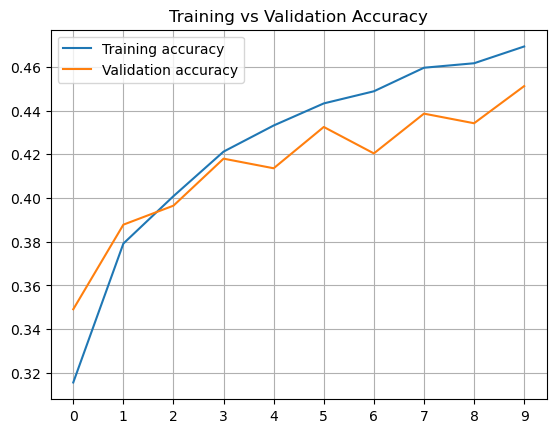

In [7]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

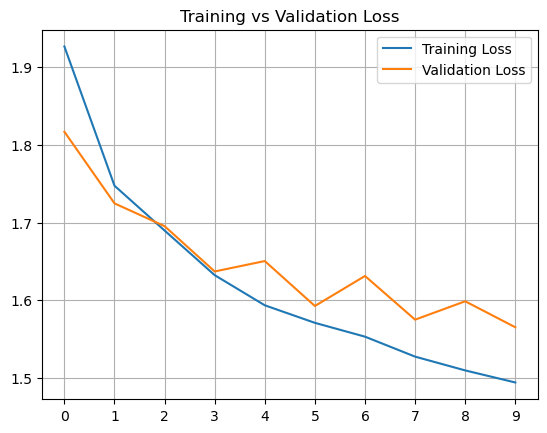

In [8]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1,len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()


In [9]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - 4ms/step - accuracy: 0.4534 - loss: 1.5434
Test loss: 1.543418526649475
Test accuracy: 0.45339998602867126


The Cifar-10 dataset contains images from 10 categories, corresponding to the target class numbers:<br>
0: airplane					<br>
1: automobile						<br>
2: bird										<br>
3: cat										<br>
4: deer										<br>
5: dog										<br>
6: frog										<br>
7: horse										<br>
8: ship										<br>
9: truck<br>

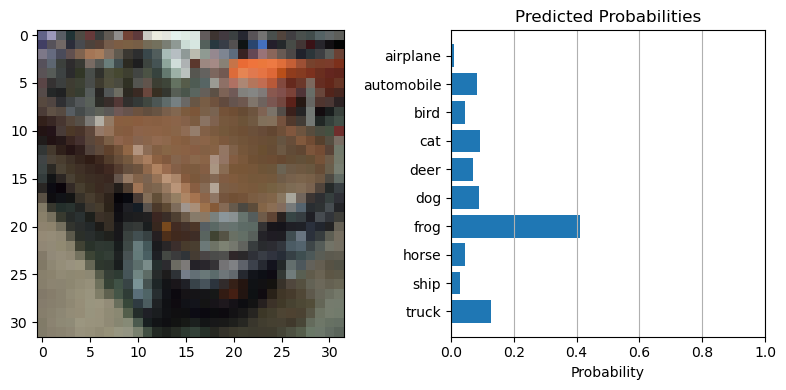

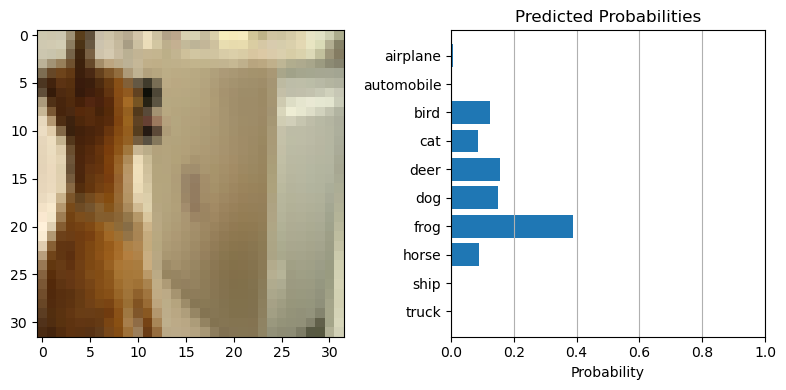

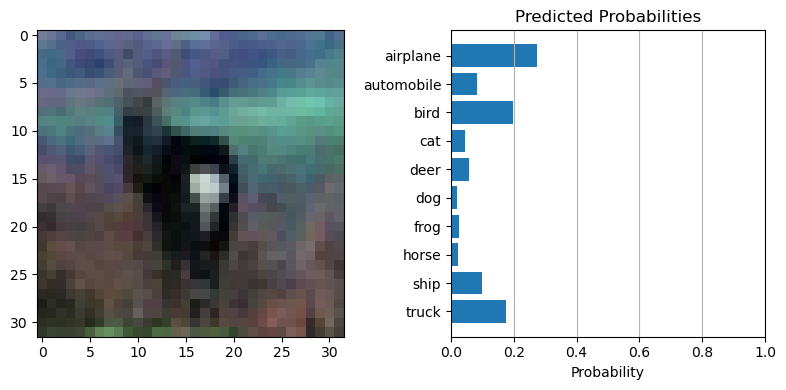

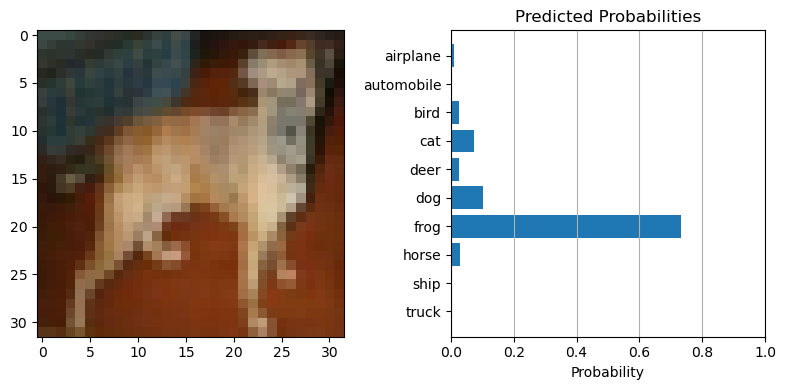

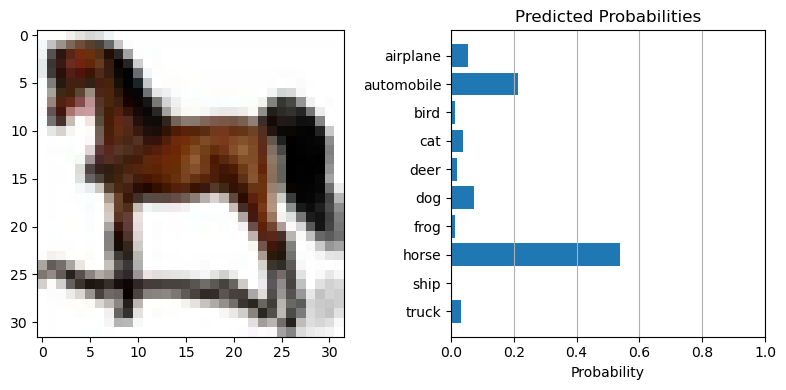

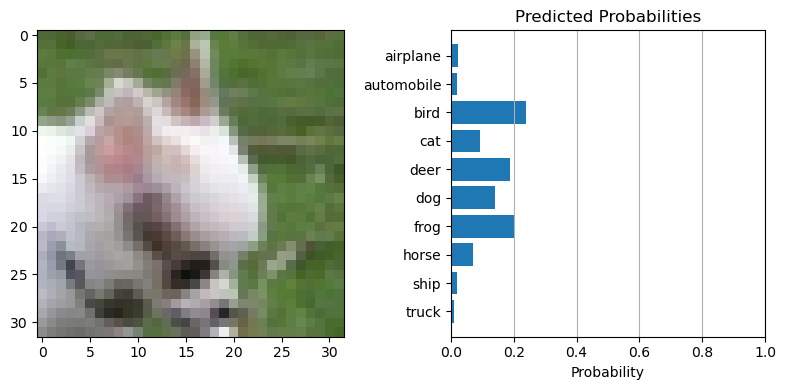

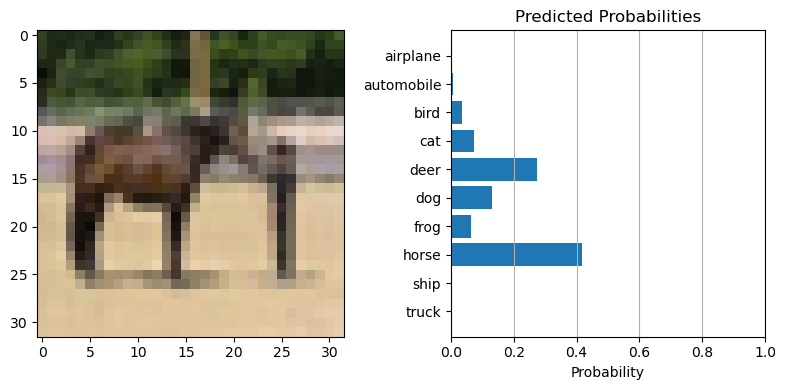

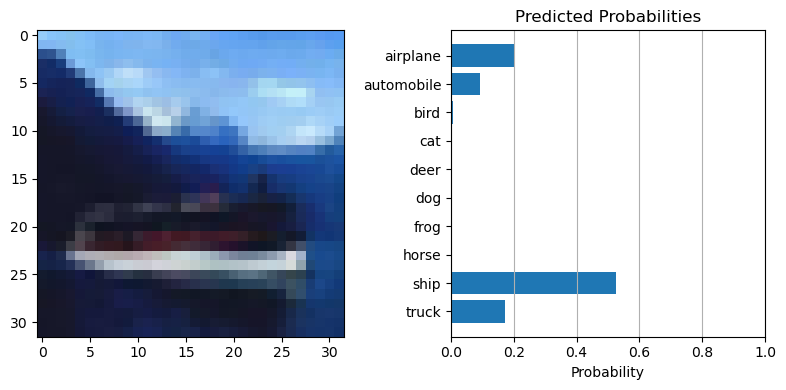

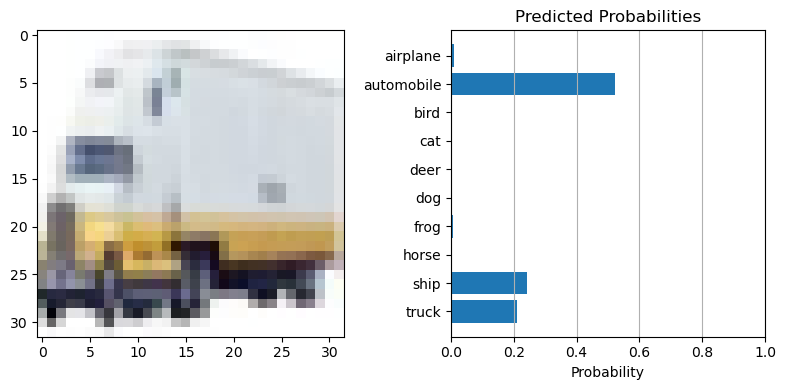

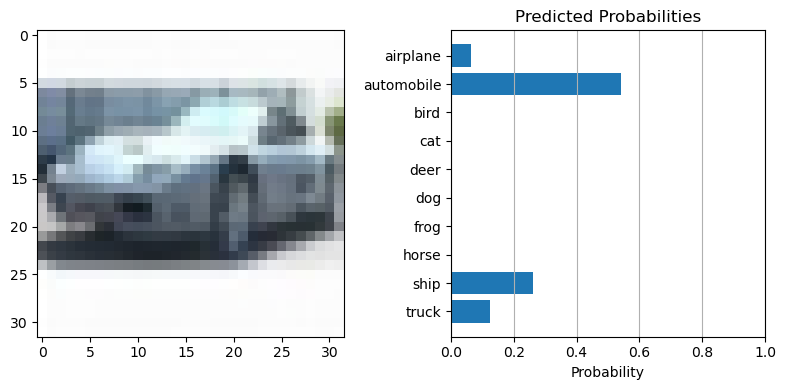

In [10]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4)) # Increased figure height for better horizontal plot
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32, 3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.barh(ind, y[start+k].numpy().flatten()) # Use barh for horizontal bars
    plt.yticks(ind, targets) # Use yticks for vertical labels
    plt.gca().invert_yaxis() # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability") # Label the x-axis as probability
    plt.title("Predicted Probabilities") # Add a title to the bar plot
    plt.xlim(0, 1) # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x') # Add grid lines for the x-axis
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Modifying the model

Here we start to tinker with the parameters of the model, testing adding layers, optimizers and callbacks.

In [294]:
# Create the model
# CIFAR-10 images are 32x32 pixels with 3 color channels (RGB)
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs) # Flatten the input for the dense layers
x = layers.Dense(1024, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(512, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(256, use_bias=False, kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(64, use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_48 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_47 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 1024)           │     3,145,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_92 (Activation)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_117 (Dropout)           │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 512)            │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_89          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_93 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_118 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 256)            │       131,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_90          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_94 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_119 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 64)             │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_95 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,825,546 (14.59 MB)

 Trainable params: 3,821,834 (14.58 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [295]:
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train_part, x_val, y_train_part, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [296]:
from keras.src.callbacks import ReduceLROnPlateau
from keras.src.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# this rotates and skew images so in learning phase, model doesnt see  exact same picture again
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

epochs = 100
batch_size = 128
# this decreases automatically learning rate towards the end
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)

optimizer = AdamW(learning_rate=0.0002, weight_decay=1e-5)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto', restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(
    datagen.flow(x_train_part, y_train_part, batch_size=batch_size),
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[earlystop,reduce_lr]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3456 - loss: 2.1049 - val_accuracy: 0.3264 - val_loss: 2.1319 - learning_rate: 2.0000e-04
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4107 - loss: 1.9016 - val_accuracy: 0.3609 - val_loss: 2.0457 - learning_rate: 2.0000e-04
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4345 - loss: 1.8279 - val_accuracy: 0.3732 - val_loss: 2.0078 - learning_rate: 2.0000e-04
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4554 - loss: 1.7737 - val_accuracy: 0.4083 - val_loss: 1.9342 - learning_rate: 2.0000e-04
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4616 - loss: 1.7403 - val_accuracy: 0.4315 - val_loss: 1.8297 - learning_rate: 2.0000e-04
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4731 - loss: 1.7106 - val_accuracy: 0.4587 - val_loss: 1.7697 - learning_rate: 2.0000e-04
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/st

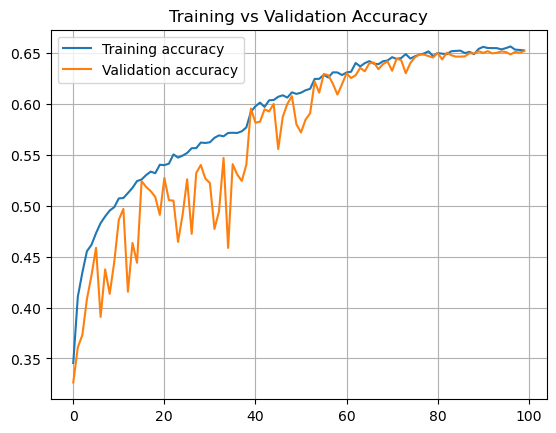

In [297]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

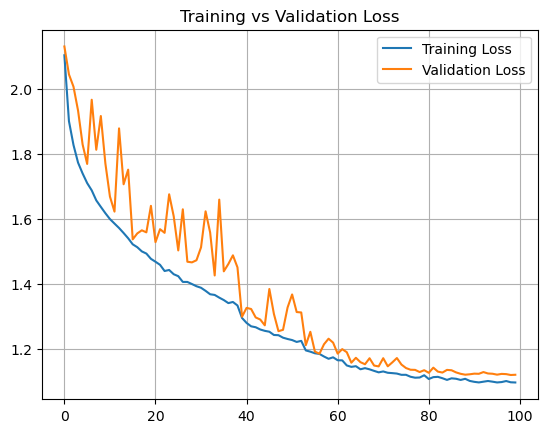

In [298]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1,len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)# limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

In [299]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

313/313 - 1s - 2ms/step - accuracy: 0.6429 - loss: 1.1209
Test loss: 1.1209276914596558
Test accuracy: 0.6428999900817871
Final training accuracy: 0.6525750160217285
Final training loss: 1.0955946445465088
Final validation accuracy: 0.6518999934196472
Final validation loss: 1.1193677186965942


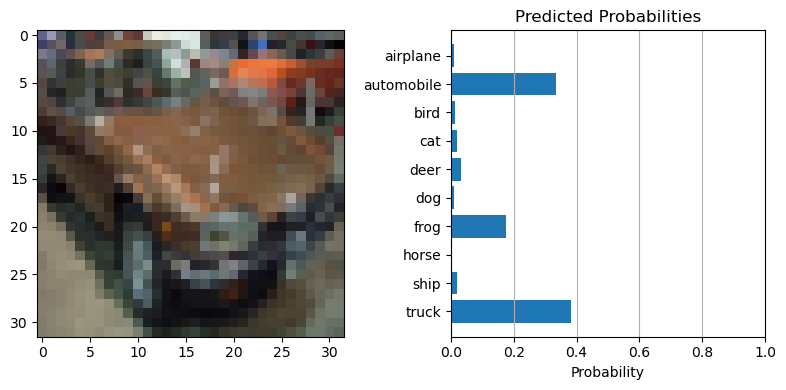

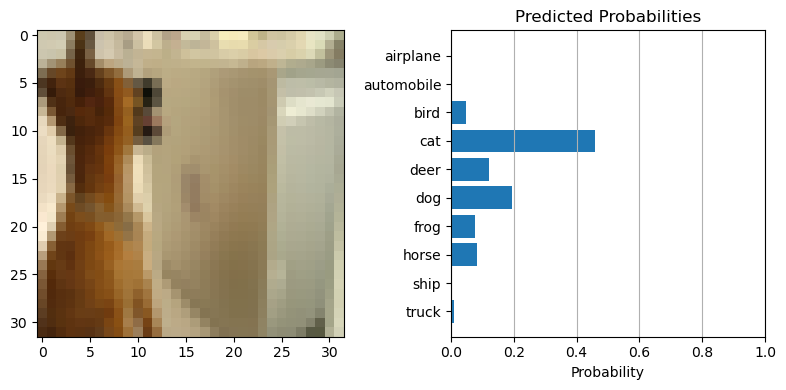

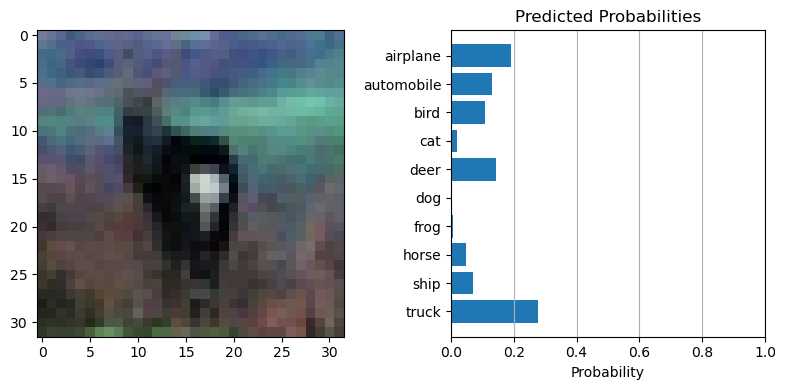

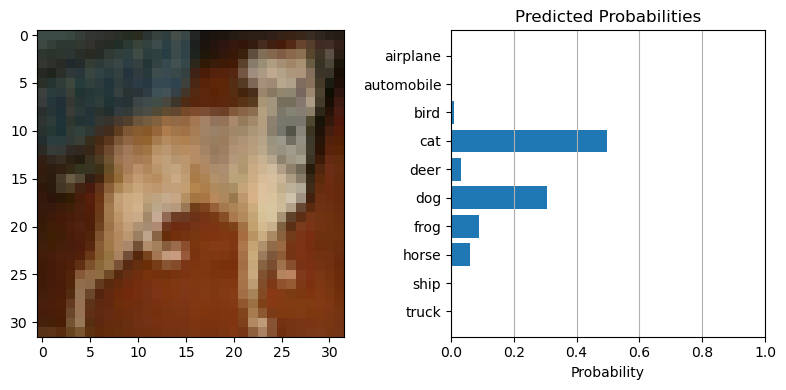

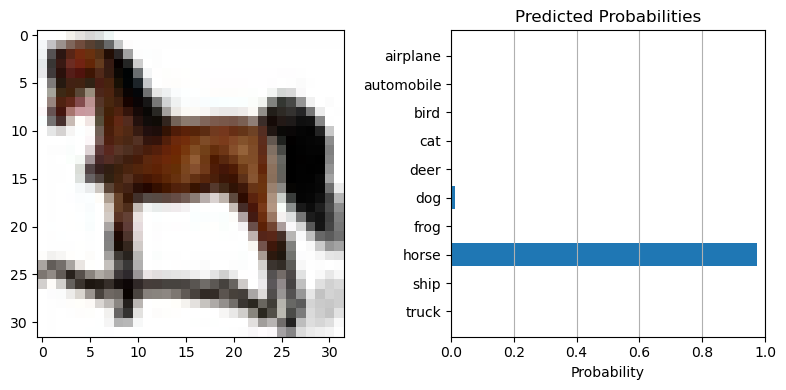

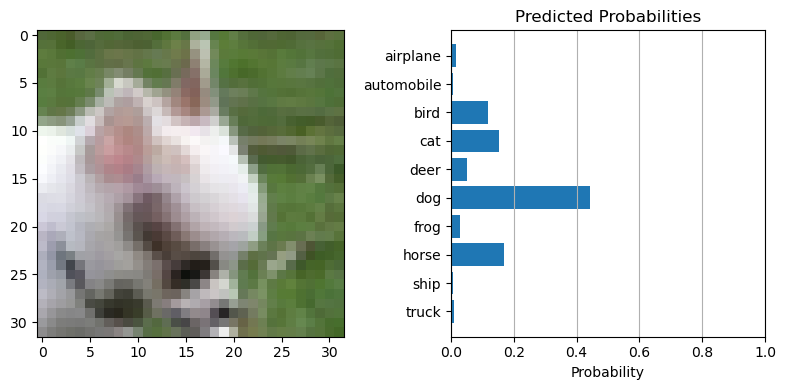

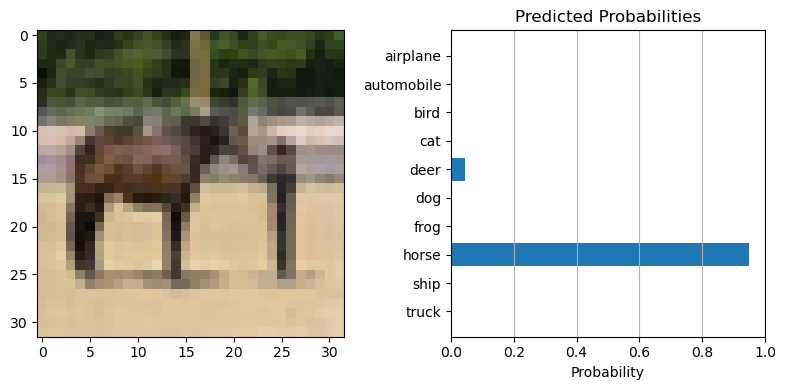

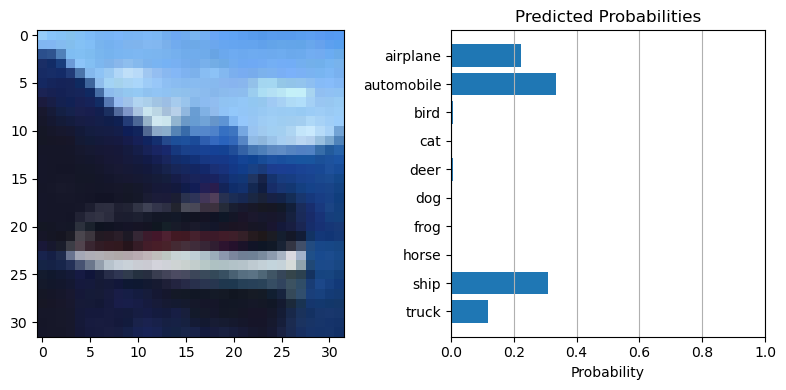

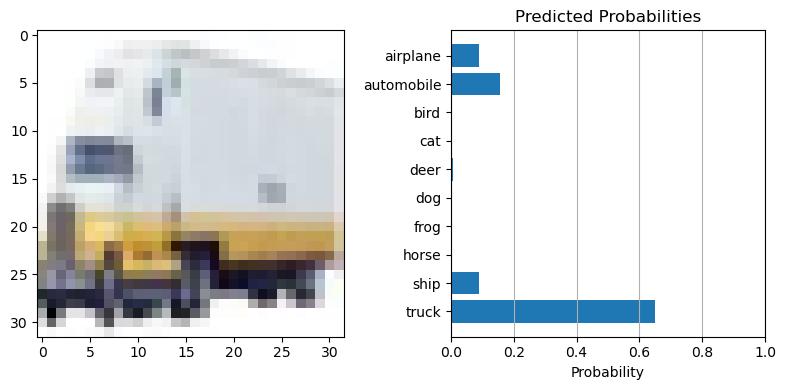

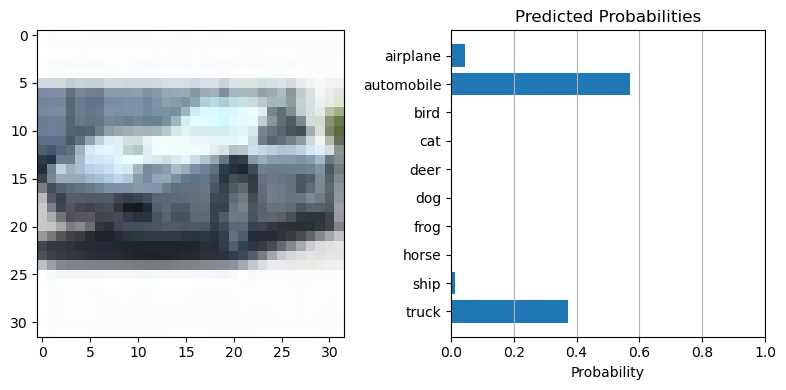

In [223]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4)) # Increased figure height for better horizontal plot
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32, 3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.barh(ind, y[start+k].numpy().flatten()) # Use barh for horizontal bars
    plt.yticks(ind, targets) # Use yticks for vertical labels
    plt.gca().invert_yaxis() # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability") # Label the x-axis as probability
    plt.title("Predicted Probabilities") # Add a title to the bar plot
    plt.xlim(0, 1) # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x') # Add grid lines for the x-axis
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()